<a href="https://colab.research.google.com/github/Himanshu8052/Bike-Sharing-Demand-Prediction/blob/main/Himanshu_Capstone_Project_on_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation  MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
#importing Libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
import datetime as dt
from time import strptime

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#import Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import dataset
bike_df = pd.read_csv('/content/drive/MyDrive/Datasets/data/Bike Share Demand-Capstone Project/SeoulBikeData.csv', encoding='latin')

**Data Inspection**

In [ ]:
#First Look of our dataset
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#Try to know more about data
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#Let's check the Shape of dataset
bike_df.shape

(8760, 14)

In [ ]:
#Looking for Descriptive form of dataset
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
bike_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
bike_df.Seasons.unique

<bound method Series.unique of 0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
8755    Autumn
8756    Autumn
8757    Autumn
8758    Autumn
8759    Autumn
Name: Seasons, Length: 8760, dtype: object>

In [ ]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#print the unique values
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

**Features Description:**




**Date:** The Date of the day during 365 days from 01/12/2017 to 30/11/2018 formatting in DD/MM/YYYY, type-str, we need to convert into datetime format.

**Rented Bike Count:** no. of rented bikes per hour which is our dependent variable and we need to predict that, type-int
**Hour:** the hour of the day starting from 0-23 it's in a digital time format, type-int, we need to convert it into category data type.

**Humidity(%):** Humidity in the air in percentage,type-int

**Wind speed(m/s):** Speed of wind,type-Float

**Visibility(10m):** Visibility in meter, type- int

**Dew point temprature**(*C):Dew point Tempreture in degree celsius, type-Float

**Solar radiation(MJ/m2)**:Power per unit area,type-Float

**Rainfall(mm):** the depth of rain in unit area,type-Float

**Snowfall(cm):** 1 mm of water produces 1 cm of snow,type-Float

**Season:** Winter, Spring, Summer, Autumn, type-Str

**Holiday:** yes or No,type-Str

**Functioning Day:** No Function or Function, type-Str






In [ ]:
#checking for Null values or missing values
bike_df.isna().sum()
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# duplicate
len(bike_df[bike_df.duplicated()])

0

# So after checking null values and duplicate values there is no null and duplicates values present in our dataset

In [ ]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

We have observed that name of the  columns in our dataset are long lets rename columns it will not affect on our dataset. 

In [ ]:
#Rename our variables name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)': 'Tempreture','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature','Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall' })

In [ ]:
bike_df

,Date,Rented_Bike_Count,Hour,Tempreture,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


Python reads 'Date' column as a object type basically as a string type and we know that the date column is very important part of our analysis so we will convert it into datetme format and will create three other columns by spliting it into 'Year', 'Month', 'Days' as a category data type. 

In [ ]:
bike_df['Date']=bike_df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
bike_df['year']=bike_df['Date'].dt.year
bike_df['month']=bike_df['Date'].dt.month
bike_df['day']=bike_df['Date'].dt.day

In [ ]:
#creating a new column of 'weekdays_weekend' and drop the column 'Date','day','year'
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0)
bike_df=bike_df.drop(columns=['Date','day','year'], axis=1)




*   so we convert "Date" column into three different column i.e. "year","month","day"
*   The "year" column is our dataset basically contains two unique number contains the details from december 2017 to November 2018 so if we consider this is a one year then we don't need the "year" column so we drop it.


*   the other column "day", it contains detail about each day of the month, for our relevance we don't need each day of each month data but we need the data about, if a day is weekday or a weekend so we convert it into this format and drop the "day" column.






In [ ]:
bike_df.head()

,Rented_Bike_Count,Hour,Tempreture,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


#Changing Data Type

*  As "Hour", "Month", "weekdays_weekend" column are show as a integer data type but actually it is a category data type. so we need to change this data type. if we do not then, while doing further analysis and correleted with this then the values are not actually true so we can misslead by this. 






In [ ]:
bike_df.nunique()

Rented_Bike_Count        2166
Hour                       24
Tempreture                546
Humidity                   90
Wind_speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning Day             2
month                      12
weekdays_weekend            1
dtype: int64

In [ ]:
#change the int64 column into category column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [ ]:
#let's check the result of data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Tempreture             8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [ ]:
bike_df['weekdays_weekend'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
8755    0
8756    0
8757    0
8758    0
8759    0
Name: weekdays_weekend, Length: 8760, dtype: category
Categories (1, int64): [0]>

In [ ]:
bike_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Tempreture', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [ ]:
bike_df['weekdays_weekend'].unique()

[0]
Categories (1, int64): [0]

[Text(0.5, 1.0, 'count of Rented Bikes according to month')]

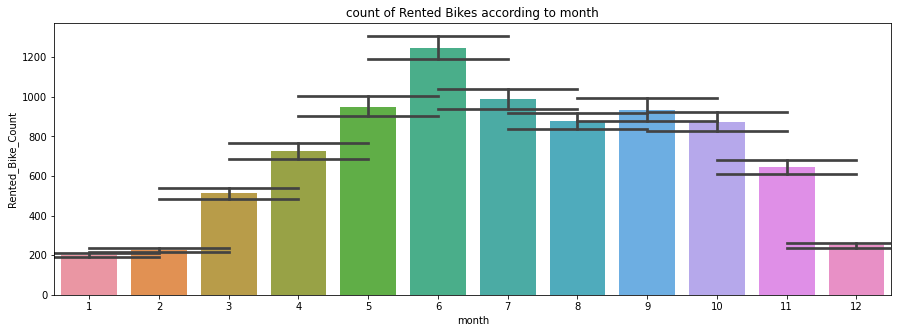

In [ ]:
#Analysis of data by visualization
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count',ax=ax, capsize=2)
ax.set(title='count of Rented Bikes according to month')

#So we can see from graph in June Month Maximum no. of bike 






[Text(0.5, 1.0, 'count of Rented Bikes according to hour')]

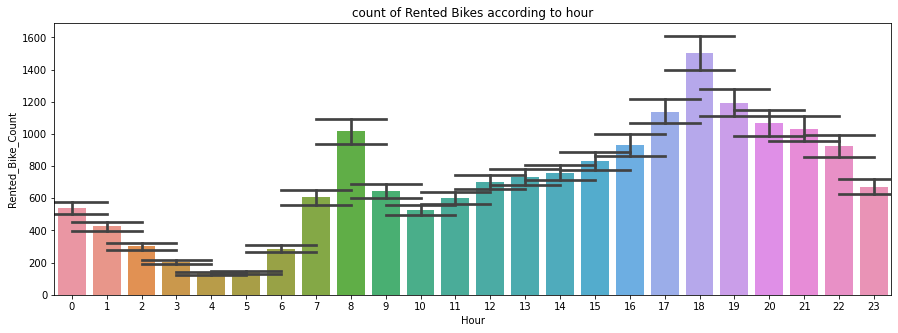

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax, capsize=2)
ax.set(title='count of Rented Bikes according to hour')

#So at 18 o'clock maximum no. of bike rennted.

[Text(0.5, 1.0, 'count of Rented Bikes according to Seasons')]

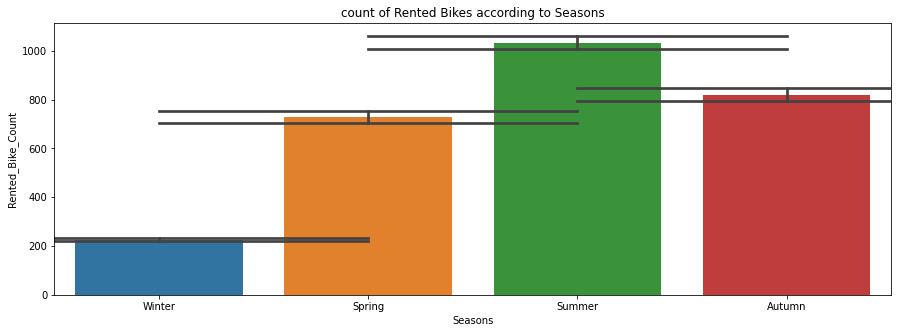

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax, capsize=2)
ax.set(title='count of Rented Bikes according to Seasons')

# So we can see in case of Winter season the bike demand is less but in Summer demand is maximum followed by Autumn and Spring.

[Text(0.5, 1.0, 'count of Rented Bikes according to Holiday')]

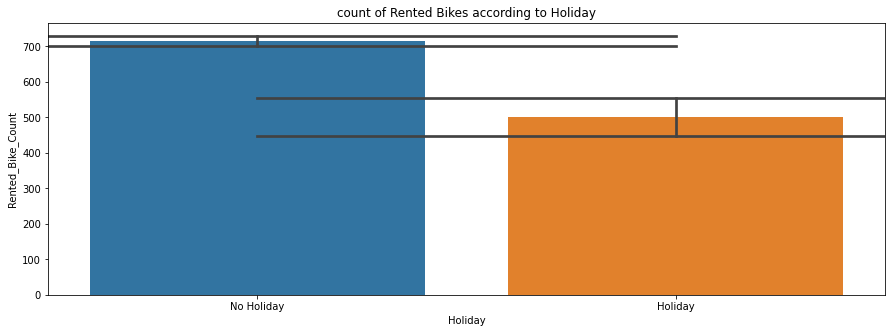

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax, capsize=2)
ax.set(title='count of Rented Bikes according to Holiday')

In [ ]:
#At Holiday the demand is less but at No holiday demand is high

[Text(0.5, 1.0, 'count of Rented Bikes according to Functioning Day')]

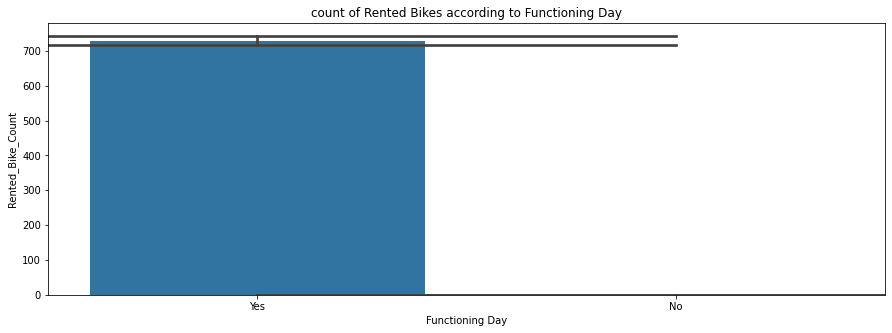

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(data=bike_df,x='Functioning Day',y='Rented_Bike_Count',ax=ax, capsize=2)
ax.set(title='count of Rented Bikes according to Functioning Day')

[Text(0.5, 1.0, 'count of Rented Bikes according to weekdays_weekend')]

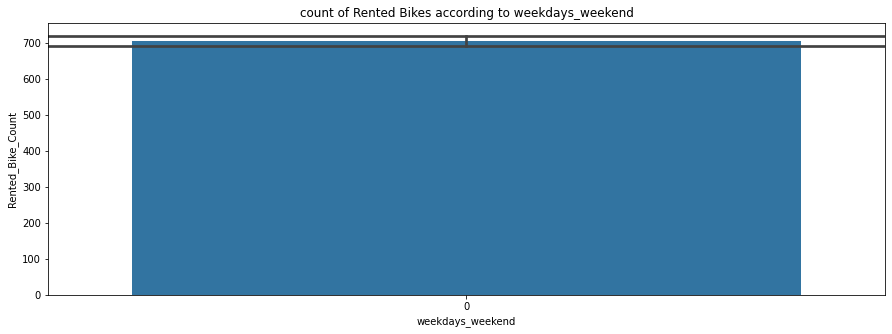

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax, capsize=2)
ax.set(title='count of Rented Bikes according to weekdays_weekend')

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Tempreture             8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

**Exploratory Data Analysis**

Analyze of Numerical variable distplots

In [ ]:
numeric_features = bike_df.describe().columns
numeric_features

Index(['Rented_Bike_Count', 'Tempreture', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

#printing distplots to analyze the distribution of all numerical features

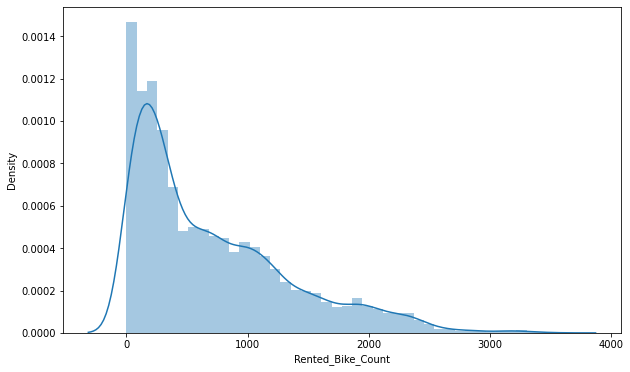

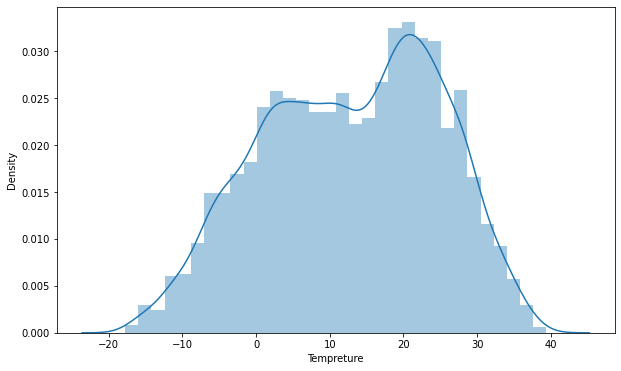

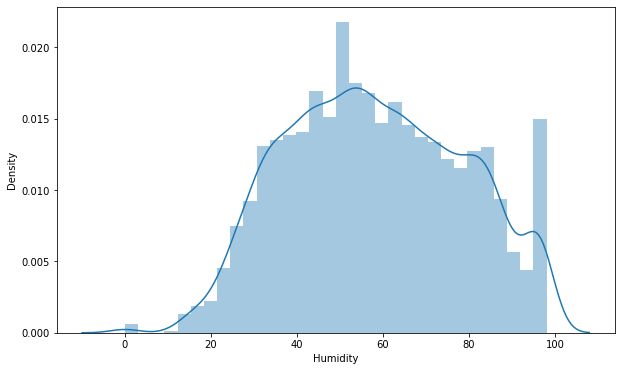

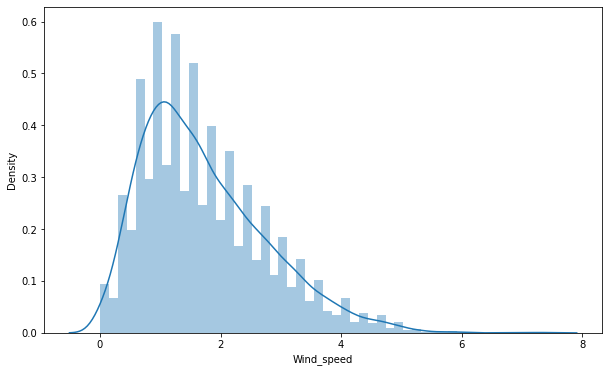

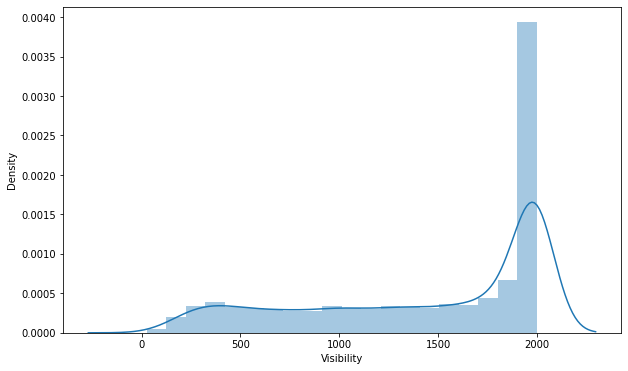

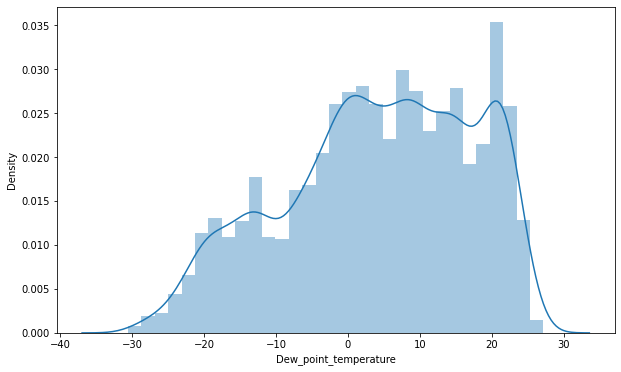

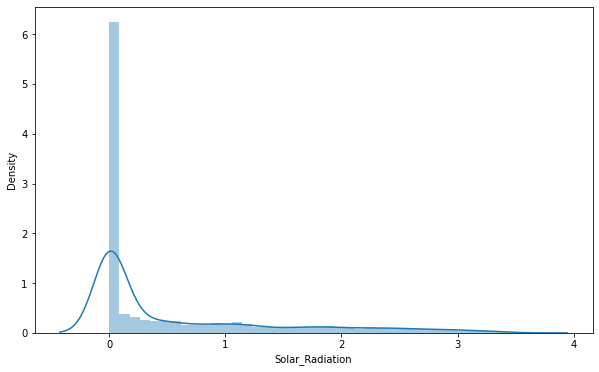

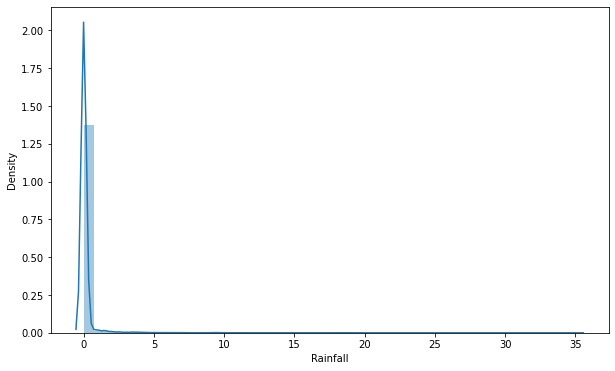

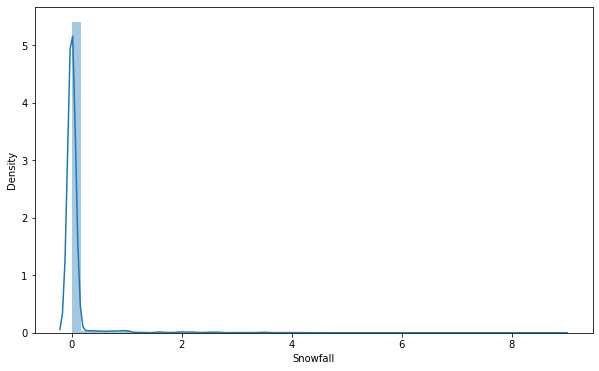

In [ ]:
#printing distplots to analyze the distribution of all numerical features
for col in numeric_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=bike_df[col])
  plt.xlabel(col)
  plt.show()

#Now Let's take average of Temperature and create a graph with respect to Rented Bike Count

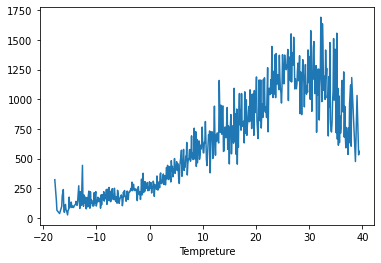

In [ ]:
bike_df.groupby('Tempreture').mean()['Rented_Bike_Count'].plot()

#In above graph we can see that when the Tempreture is in between 30 to 35 then the Rented bike count high.

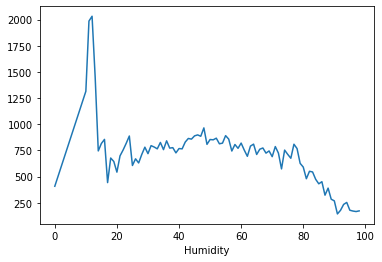

In [ ]:
bike_df.groupby('Humidity').mean()['Rented_Bike_Count'].plot()

#So when the Humidity is around 15% then the Rented Bike count is high

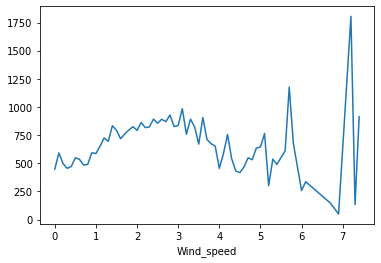

In [ ]:
bike_df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

# we can see when the wind speed is 7m/s then the maximum Rented Bike count

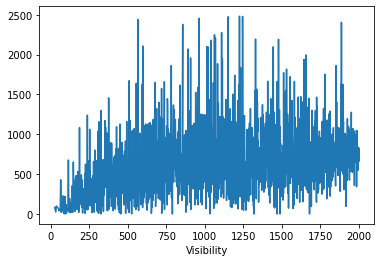

In [ ]:
bike_df.groupby('Visibility').mean()['Rented_Bike_Count'].plot()

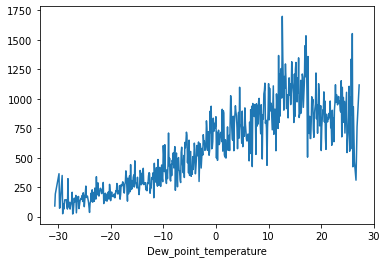

In [ ]:
bike_df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

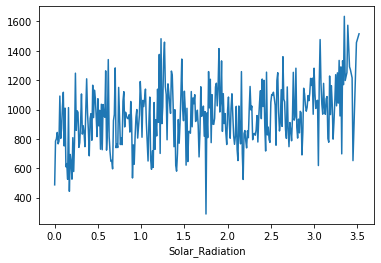

In [ ]:
bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

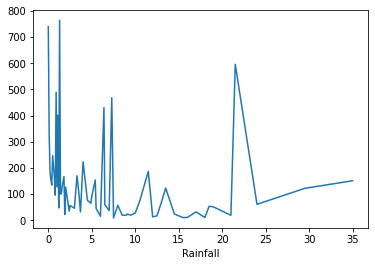

In [ ]:
bike_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

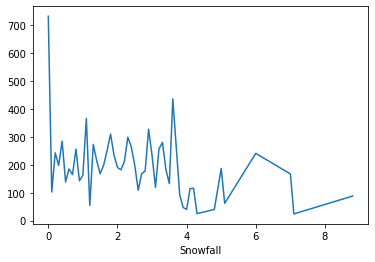

In [ ]:
bike_df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

# **Now Let's Print The Regression Plot for Numerical Variables**

In [ ]:
numeric_features

Index(['Rented_Bike_Count', 'Tempreture', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

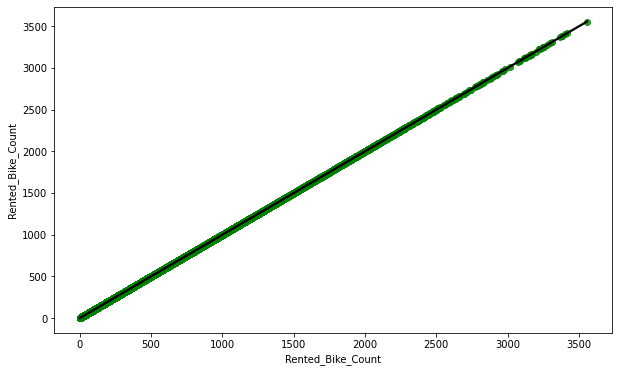

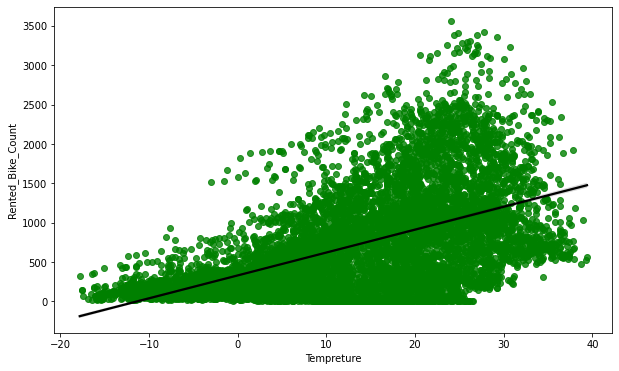

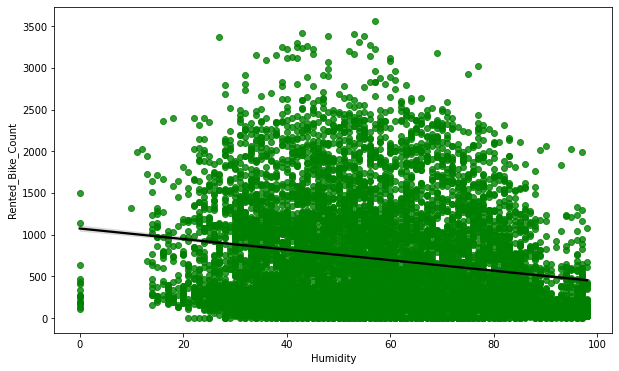

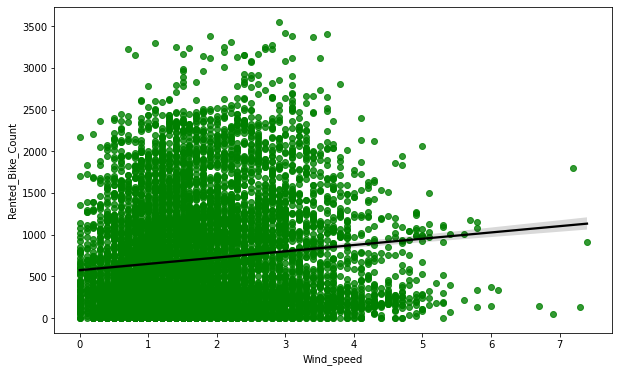

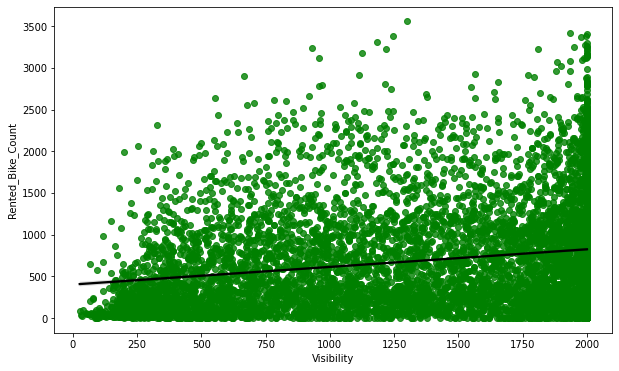

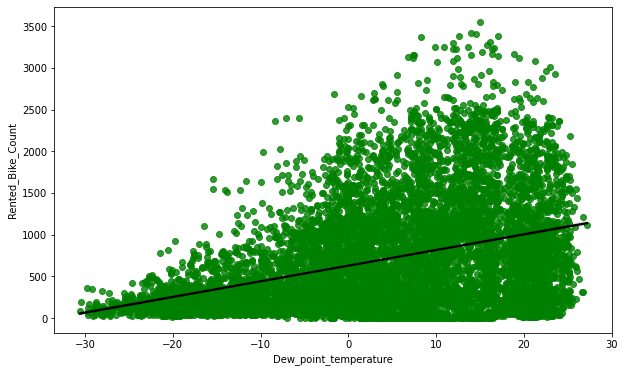

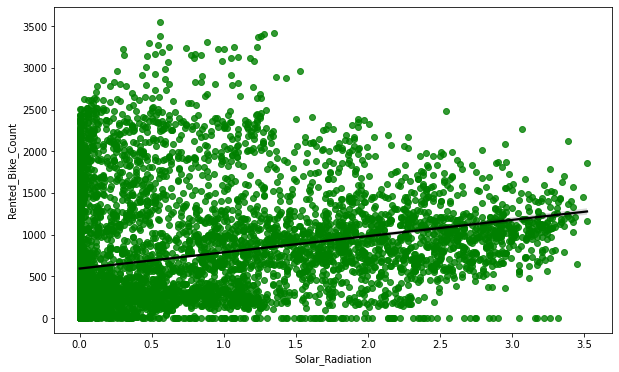

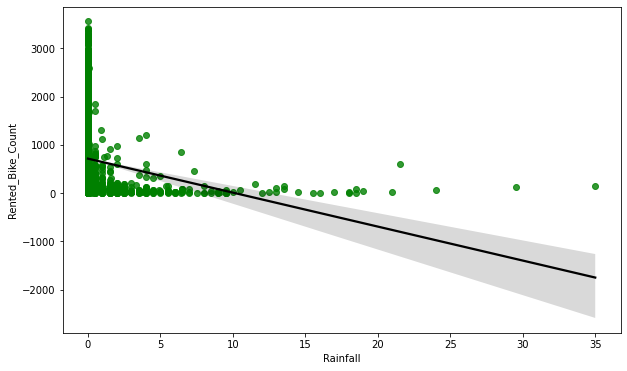

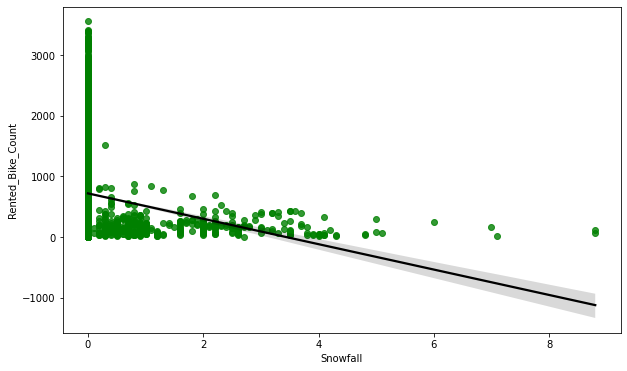

In [ ]:
#Printing Regression Plot for all Numerical Features
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color":'green'},line_kws={"color":'black'})


So from the Regresson plots we can see that the columns "Temperature", "Wind speed", "visibillity", "Dew point tempereture", "Solar Radiation" are positively related to the target variable Rented Bikr count.
which means the Target Variable increase by increasing these variables.

"Snowfall", "Rainfall", "Humidity" are Negatively related to Target Variable.which means the Target Variable increase by decreasing these variables.

#Normalize Rented Bike Count column data



*  The Data Normalization is (also referred to as data_preprocessing) a basic element of data minig. it means transforming the data, namely converting the source data  into another format that allows processing data effectively. the main purpose of data normalization is to minimize  or even exclude the duplicated data.




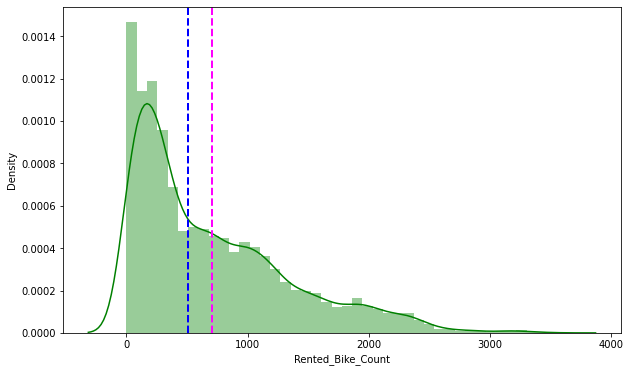

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel("Rented_Bike_Count")
plt.ylabel("Density")
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True, color="g")

ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='blue', linestyle='dashed', linewidth=2)
plt.show()

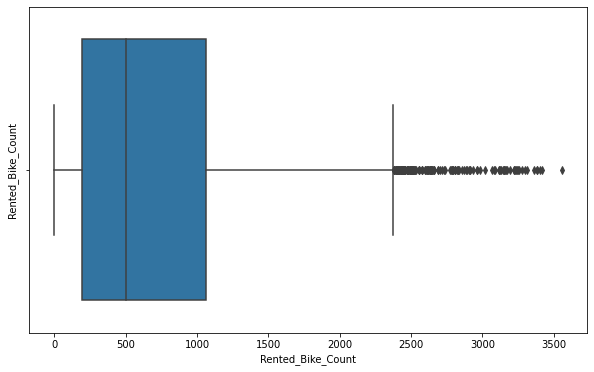

In [ ]:
#Boxplot of Rented Bike Count to chech Outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show()



* The above box plot shows that we have detect outliers in rented Bike Count column.




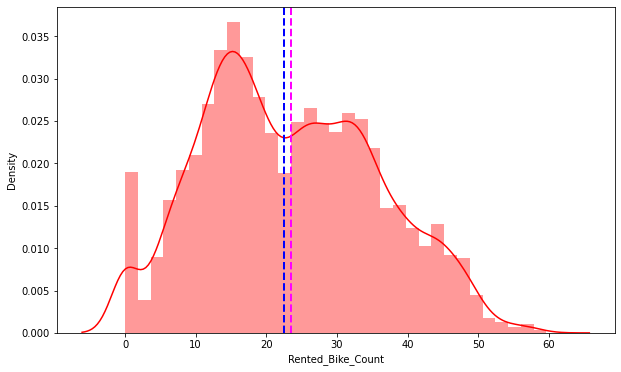

In [ ]:
#Applying Sqareroot to Rented Bike Count to improve skewness
plt.figure(figsize=(10,6))
plt.xlabel("Rented_Bike_Count")
plt.ylabel("Density")

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']),color="r")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='Blue', linestyle='dashed', linewidth=2)
plt.show()

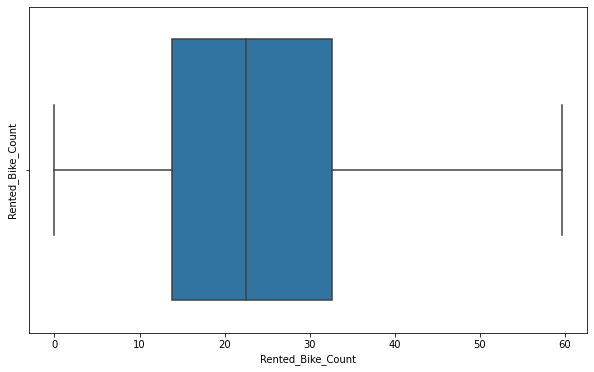

In [ ]:
#Boxplot of Rented Bike Count to chech Outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()

In [ ]:
bike_df.corr()

,Rented_Bike_Count,Tempreture,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Tempreture,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


#Checking in OLS Model
 Ordinary Least square(OLS) regression is a statistical method of analysis that estimatrs the relationship one or more independent Variables and a dependent variable

In [ ]:
#import the module
#assign the 'x', 'y' value
import statsmodels.api as sm
X=bike_df[['Tempreture','Humidity','Wind_speed','Visibility', 'Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall']]
Y=bike_df['Rented_Bike_Count']


In [ ]:
bike_df.head()

,Rented_Bike_Count,Hour,Tempreture,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


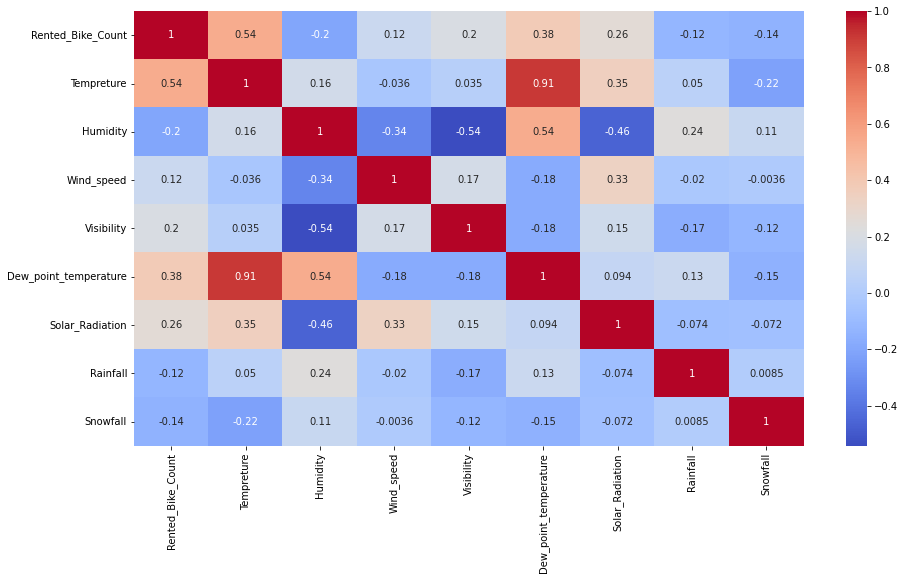

In [ ]:
# Correlation
plt.figure(figsize=(15,8))
correlation = bike_df.corr()
sns.heatmap(bike_df.corr(), annot=True, cmap='coolwarm')

We can observe from heatmap that
*   'Tempreture' is Positive Highly correlated with the 'Dew point temperature'




In [ ]:
#So let's Drop the "Dew point Temperature" column
bike_df=bike_df.drop(['Dew_point_temperature'], axis=1)

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Tempreture         8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


#Create the Dummy variables

A Dataset may contains various types of values,sometimes it contains the categorical values. So, in order to use those categorical values for programming efficiently we create dummy variables.


In [ ]:
#Assign all categorical features to a variable
categorical_features = bike_df.describe(include=['object','category']).columns
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month',
       'weekdays_weekend'],
      dtype='object')

#One Hot encoding

A one Hot encoding allows the reprentation of categorical data to be more expressive. Many ML algorith can not work with categorical data directly.so we have to convert it into numbers. This is required for both input and output variables that are categorical.

In [ ]:
#Create a copy of dataset
bike_df_copy=bike_df
def one_hot_encoding(data, column):
  data=pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
  data=data.drop([column], axis=1)
  return data

for col in categorical_features:
  bike_df_copy=one_hot_encoding(bike_df_copy,col)
bike_df_copy.head()

,Rented_Bike_Count,Tempreture,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


#Model Training

Spliting the dataset into traindata and test data to built our model

In [ ]:
#Assign the data to X and Y
X=bike_df_copy.drop(columns=['Rented_Bike_Count'],axis=1)
y=np.sqrt(bike_df_copy['Rented_Bike_Count'])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.25, random_state = 0) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6570, 46)
(2190, 46)
(6570,)
(2190,)


In [ ]:
bike_df_copy.columns

Index(['Rented_Bike_Count', 'Tempreture', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [ ]:
bike_df_copy.describe().columns

Index(['Rented_Bike_Count', 'Tempreture', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

#Linear Regression

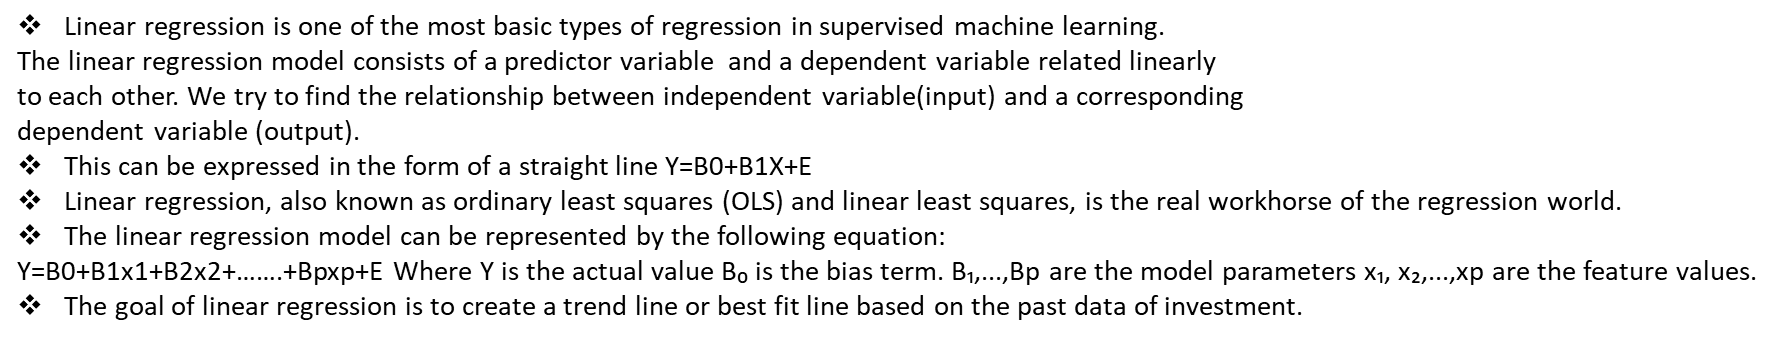

In [ ]:
#Import the package
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
#Check the score
reg.score(X_train, y_train)

0.7695621080794112

In [ ]:
#Check the coefficients
reg.coef_

array([ 5.11447798e-01, -1.25258650e-01, -1.38816627e-02,  1.07052360e-03,
        8.83131217e-01, -1.47280492e+00, -6.60040815e-02, -2.02173076e+00,
       -4.93496320e+00, -7.22341578e+00, -9.50866507e+00, -9.01759414e+00,
       -3.99132000e+00,  2.30449360e+00,  7.56232511e+00,  1.31103073e+00,
       -3.22518404e+00, -3.39099459e+00, -2.69274656e+00, -2.93510970e+00,
       -3.12673449e+00, -1.91996417e+00,  1.60343441e-01,  3.85196612e+00,
        1.02960402e+01,  6.82472099e+00,  6.12145361e+00,  6.24612226e+00,
        5.07000663e+00,  1.45135724e+00, -4.63967117e-01, -1.25881814e+00,
       -4.74938097e+00,  3.41194284e+00,  2.81058451e+01, -8.59582224e-01,
       -1.51198386e+00, -7.23178364e-01,  1.77119511e+00,  4.41988455e+00,
       -1.71634389e+00, -3.96235880e+00,  5.10476190e-01,  3.29306674e+00,
        2.66862329e+00,  1.97180277e+00])

In [ ]:
len(reg.coef_)

46

In [ ]:
reg.intercept_

-6.774292216421596

In [ ]:
#get the predict values
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_train),(y_pred_train))
print("MSE :" , MSE)
#Calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

#import packege for r-square
from sklearn.metrics import r2_score
r2 = r2_score((y_train),(y_pred_train))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_train),(y_pred_train)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))



MSE : 35.48528739781824
RMSE : 5.956952861809319
R2 : 0.7695621080794112
Adjusted R2 :  0.7646157044264261


So we see the r2 score is 0.7695 that means our model is performing well and it's capturing most of the data variance

In [ ]:
#Now let's find r2 score of test data
MSE  = mean_squared_error((y_test),(y_pred_test))
print("MSE :" , MSE)

#Calculate RMSE
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
from sklearn.metrics import r2_score
r2 = r2_score((y_test),(y_pred_test))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 34.0462578333154
RMSE : 5.834917123088845
R2 : 0.7844715261450307
Adjusted R2 :  0.7798451566642427


# so we see that our model and test model are near to eachother that means our model is successfull

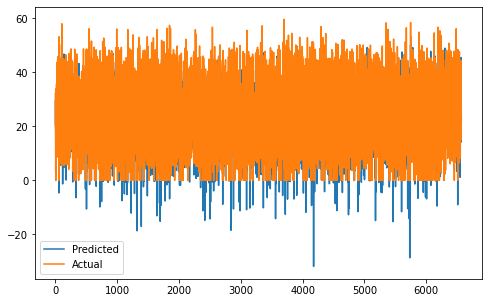

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_train)
plt.plot(np.array(y_train))
plt.legend(["Predicted","Actual"])
plt.show()

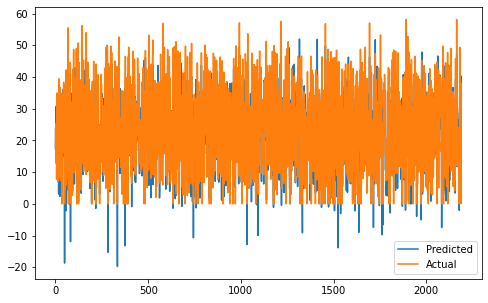

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# **Lasso and Ridge Regression:**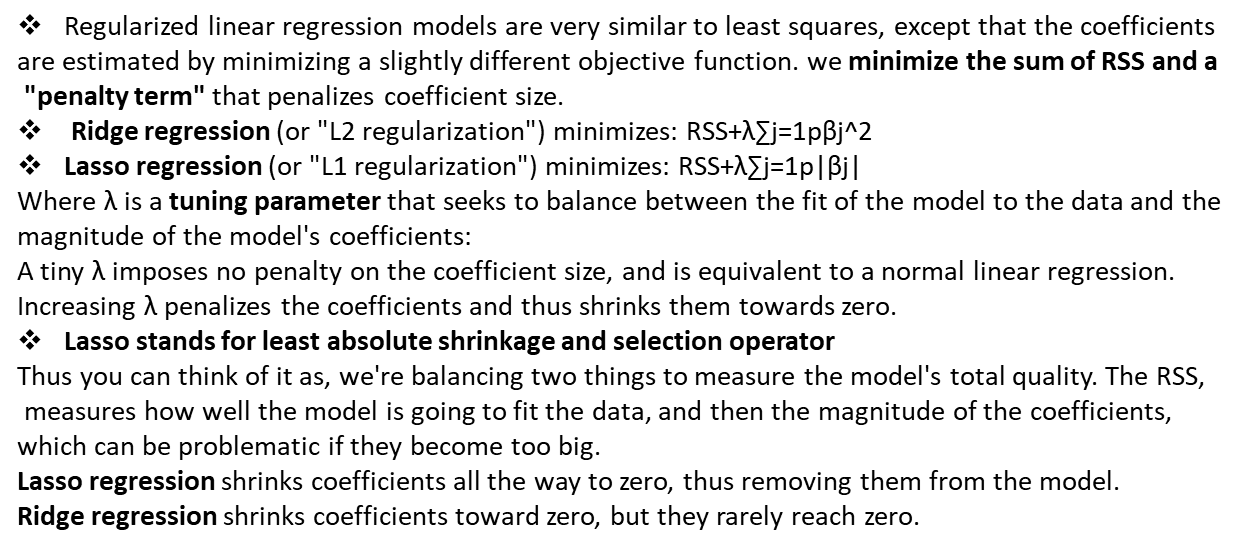

In [ ]:
#Import LASSO package
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
#Get LASSO Score
lasso.score(X_train, y_train)

0.7695620328144203

In [ ]:
lasso.coef_

array([ 5.11660837e-01, -1.25291538e-01, -1.34589904e-02,  1.07114771e-03,
        8.78685487e-01, -1.47278788e+00, -6.50588283e-02, -2.01667737e+00,
       -4.92979756e+00, -7.21805553e+00, -9.50305989e+00, -9.01184672e+00,
       -3.98557862e+00,  2.30591518e+00,  7.56436711e+00,  1.31438244e+00,
       -3.21553620e+00, -3.38026816e+00, -2.68151970e+00, -2.92391533e+00,
       -3.11615742e+00, -1.91055342e+00,  1.63595475e-01,  3.85363428e+00,
        1.02959277e+01,  6.82424208e+00,  6.12048626e+00,  6.24581781e+00,
        5.06977496e+00,  1.45113702e+00, -1.80950406e-05, -2.38207207e-01,
       -4.82706364e+00,  3.40953671e+00,  2.81017039e+01, -8.59147626e-01,
       -2.05369836e+00, -1.26588141e+00,  1.22546120e+00,  3.31703235e+00,
       -2.81791673e+00, -5.06483553e+00,  4.26732987e-01,  3.21083900e+00,
        2.58719629e+00,  1.96889958e+00])

In [ ]:
lasso.intercept_

-6.691818028521109

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -36.177188934454314


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test),(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 34.0429524162332
RMSE : 5.834633871652376
R2 : 0.7844924509557006
Adjusted R2 :  0.7798665306309047


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -36.046941588534835


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1.937043242146257e+113
RMSE : 4.401185342775576e+56
R2 : 0.7843838739871223
Adjusted R2 :  0.7797556230321095


**ElasticNet Regression:**
is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions.

Linear regression refers to a model that assumes a linear relationship between input variables and the target variable.

With a single input variable, this relationship is a line, and with higher dimensions, this relationship can be thought of as a hyperplane that connects the input variables to the target variable. The coefficients of the model are found via an optimization process that seeks to minimize the sum squared error between the predictions (yhat) and the expected target values (y).




In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.6244987973389637

In [ ]:
y_pred_en = elasticnet.predict(X_test)


In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 59.80613603969854
RMSE : 7.733442702942755
R2 : 0.6213996471827902
Adjusted R2 :  0.6132729013920335


**Conclusion**


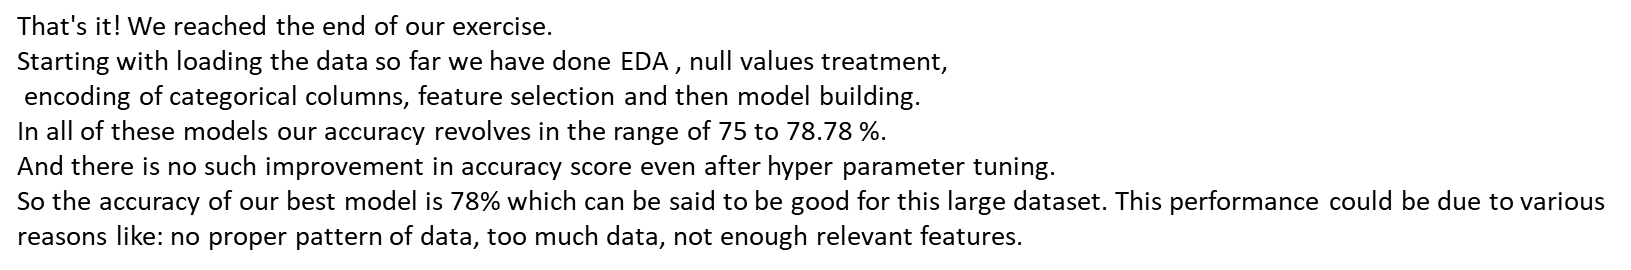